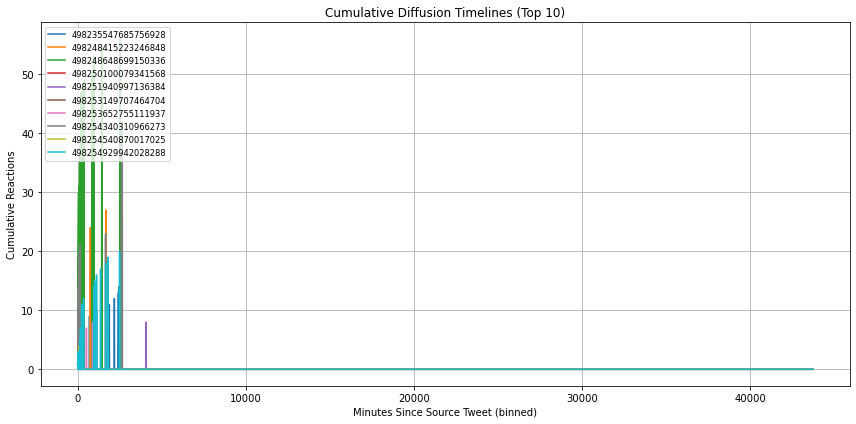

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("outputs/diffusion_timelines.csv")
df = df[df["minutes_since_source"] >= 0]

binned_counts = (
    df.groupby(["sourceTweetID", "time_bin"])
    .size()
    .reset_index(name="bin_count")
)

binned_counts["cumulative_count"] = (
    binned_counts
    .sort_values(["sourceTweetID", "time_bin"])
    .groupby("sourceTweetID")["bin_count"]
    .cumsum()
)

pivot_df = binned_counts.pivot(index="time_bin", columns="sourceTweetID", values="cumulative_count").fillna(0)

# Ensure columns are strings and safely indexable
pivot_df.columns = pivot_df.columns.astype(str)

plt.figure(figsize=(12, 6))
for col in pivot_df.columns[:10]:  # plot top 10
    plt.plot(pivot_df.index.to_numpy(), pivot_df[col].to_numpy(), label=str(col))

plt.title("Cumulative Diffusion Timelines (Top 10)")
plt.xlabel("Minutes Since Source Tweet (binned)")
plt.ylabel("Cumulative Reactions")
plt.grid(True)
plt.legend(loc="upper left", fontsize="small")
plt.tight_layout()
plt.show()